In [164]:
import pandas as pd
df = pd.read_csv('../data/X_df.csv')

In [165]:
features_to_scale = ['age',	'bio_length',	'likes_received',	'emoji_usage_rate',	'message_sent_count']
other_features = [col for col in df.columns if col not in features_to_scale]

In [166]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features_to_scale])

In [167]:
from sklearn.cluster import KMeans
import numpy as np

X = np.hstack((X_scaled, df[other_features].values))

rg = range(2, 15)
within_cluster_distance = []

for k in rg:
    k_means = KMeans(n_clusters= k, random_state=42)
    k_means.fit(X)
    within_cluster_distance.append(np.sqrt(k_means.inertia_))

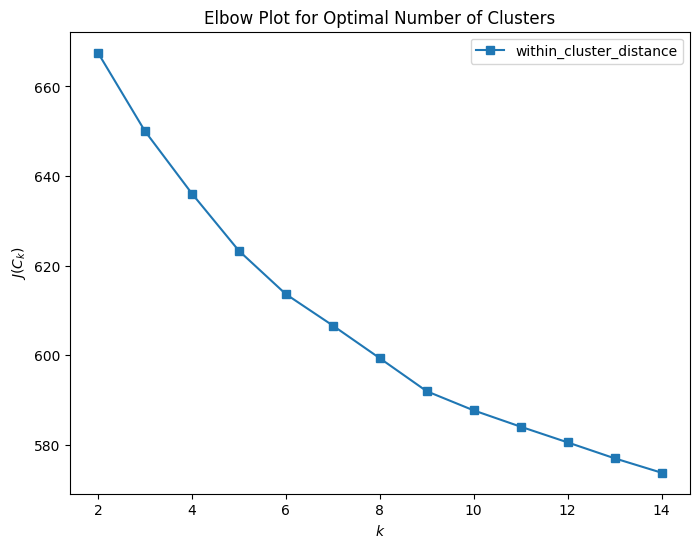

In [168]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(rg, within_cluster_distance, marker='s', label='within_cluster_distance')

plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.legend()

plt.show()

In [169]:
# According to the previous image, I selected 7 as the elbow for k 
kmeans = KMeans(n_clusters= 7, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

print(df['cluster'].value_counts())

cluster
0    8165
4    8163
6    7182
5    7117
3    6663
1    6424
2    6286
Name: count, dtype: int64


In [170]:
df

,female,gender_not_specified,male,not_cis,asexual,bi/pan/demi_sexual,heterosexual,homosexual,queer,income,casual_dating,non_romantic_relationship,serious_dating,basic_education,graduate,undergrad,rural_location,semi_urban_location,urban_location,air_zodiac_sign,earth_zodiac_sign,fire_zodiac_sign,water_zodiac_sign,age,bio_length,likes_received,emoji_usage_rate,message_sent_count,cluster
0,0,1,0,0,0,0,0,1,0,2,0,1,0,0,0,1,0,0,1,0,1,0,0,56,44,173,0.36,75,6
1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,40,301,107,0.42,35,3
2,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,30,309,91,0.41,33,3
3,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,57,35,147,0.07,5,5
4,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,24,343,94,0.11,34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,1,0,0,0,1,0,2,1,0,0,0,1,0,0,0,1,0,0,0,1,45,235,99,0.19,9,5
49996,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,26,278,173,0.23,69,1
49997,0,0,1,0,0,1,0,0,0,2,0,0,1,1,0,0,1,0,0,0,0,0,1,45,128,123,0.36,94,6
49998,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,29,206,149,0.36,53,1


Analysing the clusters grouping

In [171]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 1000)  

In [173]:
df.groupby('cluster').mean(numeric_only=True)

,female,gender_not_specified,male,not_cis,asexual,bi/pan/demi_sexual,heterosexual,homosexual,queer,income,casual_dating,non_romantic_relationship,serious_dating,basic_education,graduate,undergrad,rural_location,semi_urban_location,urban_location,air_zodiac_sign,earth_zodiac_sign,fire_zodiac_sign,water_zodiac_sign,age,bio_length,likes_received,emoji_usage_rate,message_sent_count
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.163135,0.161176,0.173056,0.502633,0.130557,0.364115,0.129088,0.253154,0.123086,1.018249,0.330312,0.498714,0.170974,0.327618,0.448132,0.224250,0.341090,0.331537,0.327373,0.246908,0.254746,0.255726,0.242621,26.173056,114.388242,86.934231,0.240011,49.840539
1,0.161270,0.169832,0.160492,0.508406,0.119863,0.364570,0.128269,0.252646,0.134651,0.968711,0.340598,0.495019,0.164384,0.332347,0.447852,0.219801,0.340909,0.333281,0.325809,0.261986,0.234433,0.249377,0.254203,26.916252,366.283468,147.616905,0.248454,41.908313
2,0.171651,0.163538,0.167356,0.497455,0.124085,0.381324,0.126312,0.245784,0.122494,0.989819,0.335826,0.496659,0.167515,0.324531,0.447980,0.227490,0.341712,0.326122,0.332167,0.255329,0.255807,0.235126,0.253738,48.794146,137.978683,43.815781,0.255659,60.860961
3,0.173946,0.165691,0.166442,0.493922,0.129521,0.374156,0.122918,0.251688,0.121717,0.999550,0.324629,0.510281,0.165091,0.328381,0.441093,0.230527,0.339337,0.332433,0.328231,0.257241,0.245235,0.244484,0.253039,37.926760,248.330332,98.767972,0.562409,49.278403
4,0.168688,0.172608,0.167953,0.490751,0.123362,0.369227,0.130344,0.251378,0.125689,1.030871,0.336886,0.492956,0.170158,0.333823,0.443832,0.222345,0.338111,0.335906,0.325983,0.244640,0.255176,0.246356,0.253828,37.446160,393.974764,42.365919,0.236552,48.770428
5,0.168470,0.177041,0.152592,0.501897,0.119432,0.374737,0.129408,0.244204,0.132219,0.978362,0.316987,0.509484,0.173528,0.333568,0.436982,0.229451,0.333708,0.327245,0.339047,0.252494,0.249684,0.255866,0.241956,48.116060,218.107630,136.208936,0.236632,20.878320
6,0.167363,0.156920,0.166110,0.509607,0.127820,0.391256,0.118351,0.241437,0.121136,1.043860,0.327485,0.499861,0.172654,0.349624,0.443191,0.207185,0.324561,0.341827,0.333612,0.250070,0.254247,0.252576,0.243108,45.912281,268.934559,148.906154,0.248542,79.338903
